**Who Thrived, Who Struggled?**

---



---




# The Global Jobs, GDP, and Unemployment Dataset (1991–2022) offers a comprehensive look at how economies and labor markets have evolved over the last three decades. It brings together key indicators, including Gross Domestic Product (GDP), employment rates, and unemployment levels, to explore the dynamic relationship between economic growth and jobs across countries and regions.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from plotly.offline import init_notebook_mode

In [12]:
df = pd.read_csv('/content/sample_data/Employment_Unemployment_GDP_data.csv')
df.head()
sns.set_theme(style = 'darkgrid')

In [18]:
print("Raw & Column", df.shape)
print("\n info: \n")
print(df.info())
df.isna().sum()
df.describe(include = 'all')

Raw & Column (5751, 7)

 info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5751 entries, 0 to 5750
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    5751 non-null   object 
 1   Year                            5751 non-null   int64  
 2   Employment Sector: Agriculture  5751 non-null   float64
 3   Employment Sector: Industry     5751 non-null   float64
 4   Employment Sector: Services     5751 non-null   float64
 5   Unemployment Rate               5751 non-null   float64
 6   GDP (in USD)                    5751 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 314.6+ KB
None


,Country Name,Year,Employment Sector: Agriculture,Employment Sector: Industry,Employment Sector: Services,Unemployment Rate,GDP (in USD)
count,5751,5751.000000,5751.000000,5751.000000,5751.000000,5751.000000,5.751000e+03
unique,183,NaN,NaN,NaN,NaN,NaN,NaN
top,Albania,NaN,NaN,NaN,NaN,NaN,NaN
freq,32,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2006.568945,28.857051,19.773784,51.369166,8.155004,3.099333e+11
std,NaN,9.175548,24.026669,8.606954,18.892155,6.147428,1.375556e+12
min,NaN,1991.000000,0.107774,2.060372,5.314014,0.100000,7.228540e+07
25%,NaN,1999.000000,7.173214,13.889285,36.846735,3.659000,5.098458e+09
50%,NaN,2007.000000,22.172104,20.105516,52.657618,6.358000,1.972356e+10
75%,NaN,2014.000000,46.130703,25.345213,66.602313,10.996000,1.277237e+11


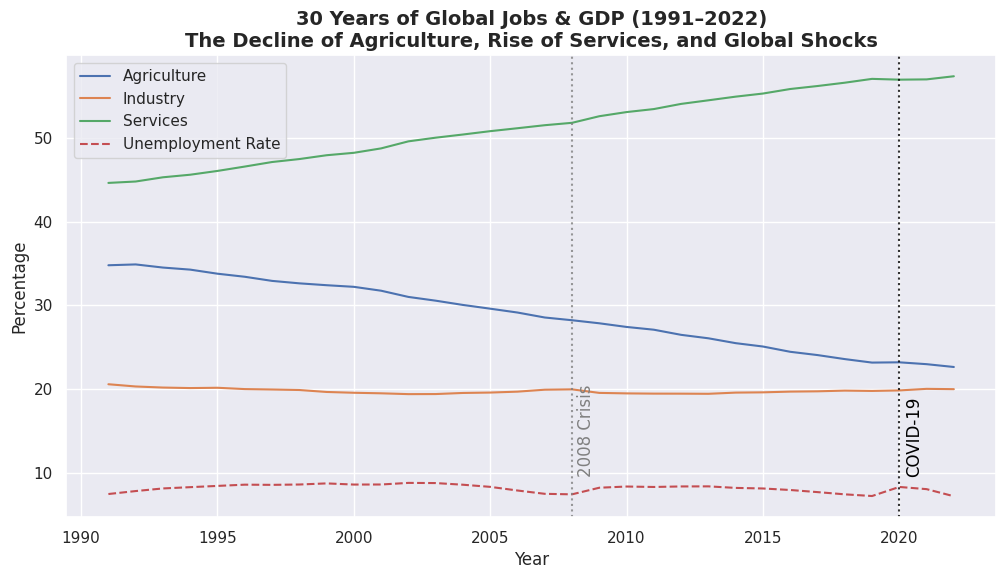

In [24]:
global_trends = df.groupby("Year")[[
    "Employment Sector: Agriculture",
    "Employment Sector: Industry",
    "Employment Sector: Services",
    "Unemployment Rate"
]].mean().reset_index()

colors = {
    "Employment Sector: Agriculture": "saddlebrown",
    "Employment Sector: Industry": "seagreen",
    "Employment Sector: Services": "royalblue",
    "Unemployment Rate": "red"
}

plt.figure(figsize=(12,6))
for col in ["Employment Sector: Agriculture", "Employment Sector: Industry", "Employment Sector: Services"]:
    plt.plot(global_trends["Year"], global_trends[col], label=col.split(": ")[1])

plt.plot(global_trends["Year"], global_trends["Unemployment Rate"], label="Unemployment Rate", linestyle="--")
plt.title("30 Years of Global Jobs & GDP (1991–2022)\nThe Decline of Agriculture, Rise of Services, and Global Shocks", fontsize=14, weight="bold")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.axvline(2008, color="grey", linestyle=":", alpha=0.8)
plt.text(2008.2, 10, "2008 Crisis", rotation=90, color="grey")

plt.axvline(2020, color="black", linestyle=":", alpha=0.8)
plt.text(2020.2, 10, "COVID-19", rotation=90, color="black")



plt.legend()
plt.show()


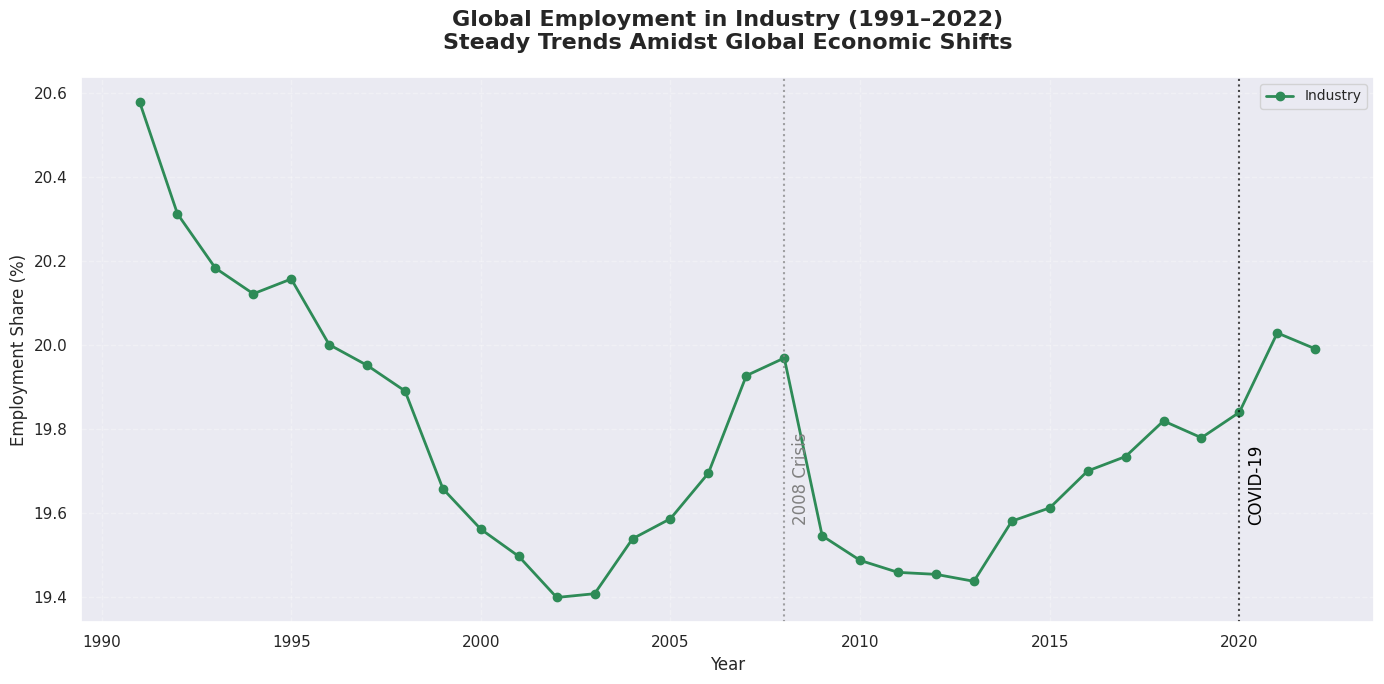

In [25]:


plt.figure(figsize=(14,7))


plt.plot(global_trends["Year"], global_trends["Employment Sector: Industry"],
         label="Industry",
         marker="o",
         markersize=6,
         linewidth=2,
         color="seagreen")


plt.title("Global Employment in Industry (1991–2022)\nSteady Trends Amidst Global Economic Shifts",
          fontsize=16, weight="bold", pad=20)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Employment Share (%)", fontsize=12)


plt.grid(alpha=0.3, linestyle="--")


plt.axvline(2008, color="grey", linestyle=":", alpha=0.7)
plt.text(2008.2, global_trends["Employment Sector: Industry"].max()-1, "2008 Crisis", rotation=90, color="grey")

plt.axvline(2020, color="black", linestyle=":", alpha=0.7)
plt.text(2020.2, global_trends["Employment Sector: Industry"].max()-1, "COVID-19", rotation=90, color="black")


plt.legend(fontsize=10, loc="best")
plt.tight_layout()

plt.show()


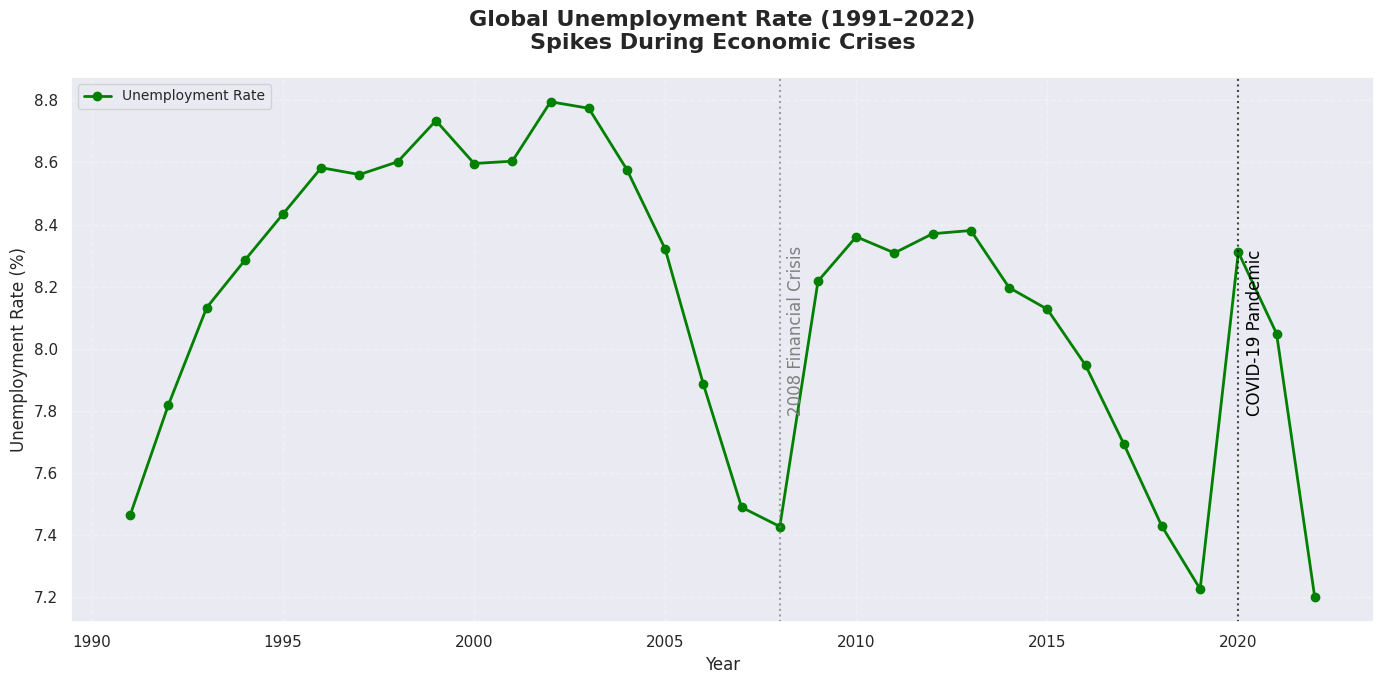

In [28]:

plt.figure(figsize=(14,7))

# Plot unemployment rate
plt.plot(global_trends["Year"], global_trends["Unemployment Rate"],
         label="Unemployment Rate",
         marker="o",
         markersize=6,
         linewidth=2,
         color="green")

# Title and labels
plt.title("Global Unemployment Rate (1991–2022)\nSpikes During Economic Crises",
          fontsize=16, weight="bold", pad=20)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Unemployment Rate (%)", fontsize=12)

# Grid for readability
plt.grid(alpha=0.3, linestyle="--")

# Highlight major crises
plt.axvline(2008, color="grey", linestyle=":", alpha=0.7)
plt.text(2008.2, max(global_trends["Unemployment Rate"])-1, "2008 Financial Crisis", rotation=90, color="grey")

plt.axvline(2020, color="black", linestyle=":", alpha=0.7)
plt.text(2020.2, max(global_trends["Unemployment Rate"])-1, "COVID-19 Pandemic", rotation=90, color="black")

# Legend and layout
plt.legend(fontsize=10, loc="best")
plt.tight_layout()

plt.show()


In [34]:

init_notebook_mode(connected=True)

regional_leaders = [
    "China", "India", "Japan","Russian Federation",
    "Nigeria", "South Africa", "Egypt, Arab Rep.",
    "Germany", "United Kingdom", "France",
    "United States", "Canada", "Mexico",
    "Brazil", "Argentina", "Chile",
    "Australia", "New Zealand", "Fiji"
]

fig = px.area(
    df[df["Country Name"].isin(regional_leaders)],
    x="Year",
    y="Employment Sector: Agriculture",
    color="Country Name",
    facet_col="Country Name",
    facet_col_wrap=3,
    height=1800,
    width=900,
    title="Employment in Agriculture (1991–2022) Across Regional Leaders",
    labels={"Employment Sector: Agriculture": "Agriculture Employment (%)", "Year": "Year"},
    hover_data={"Country Name": True, "Year": True, "Employment Sector: Agriculture": ':.2f'}
)

fig.update_layout(
    showlegend=False,
    title_font_size=20,
    margin=dict(t=100, l=50, r=50, b=50)
)
fig.update_yaxes(matches=None)


fig.update_layout(
    showlegend=False,
    title_font_size=20,
    margin=dict(t=100, l=50, r=50, b=50)
)


fig.show("colab")


In [36]:
init_notebook_mode(connected=True)

fig = px.scatter(
    df[df["Country Name"].isin(regional_leaders)],
    x="Year",
    y="Employment Sector: Industry",
    color="Country Name",
    facet_col="Country Name",
    facet_col_wrap=3,
    trendline="ols",
    height=1800,
    width=900,
    title="Employment in Industry (1991–2022) Across Regional Leaders (with Trendline)"
)


fig.update_xaxes(showticklabels=True, matches=None)
fig.update_yaxes(matches=None)


fig.update_layout(
    title_font_size=20,
    margin=dict(t=100, l=50, r=50, b=50),
    showlegend=False
)

fig.show("colab")


In [40]:

import plotly.io as pio

pio.renderers.default = "colab"

fig = px.line(
    df[df["Country Name"].isin(regional_leaders)],
    x="Year",
    y="Unemployment Rate",
    color="Country Name",
    facet_col="Country Name",
    facet_col_wrap=3,
    markers=True,
    height=1800,
    width=900,
    title=" Unemployment Rate Trends (1991–2022) – Regional Leaders"
)


for crisis_year, crisis_name in [(2008, "Global Financial Crisis"), (2020, "COVID-19 Pandemic")]:
    fig.add_vline(x=crisis_year, line_width=2, line_dash="dash", line_color="black")
    fig.add_annotation(
        x=crisis_year, y=15, text=crisis_name,
        showarrow=False, xanchor="left", font=dict(color="black", size=10)
    )

fig.update_layout(
    legend_title="Country",
    yaxis_title="Unemployment Rate (%)",
    xaxis_title="Year",
    title_font=dict(size=18, family="Arial", color="black"),
    plot_bgcolor="white"
)


fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor="lightgrey")
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor="lightgrey")

fig.show()

/tmp/ipython-input-247523296.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-247523296.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




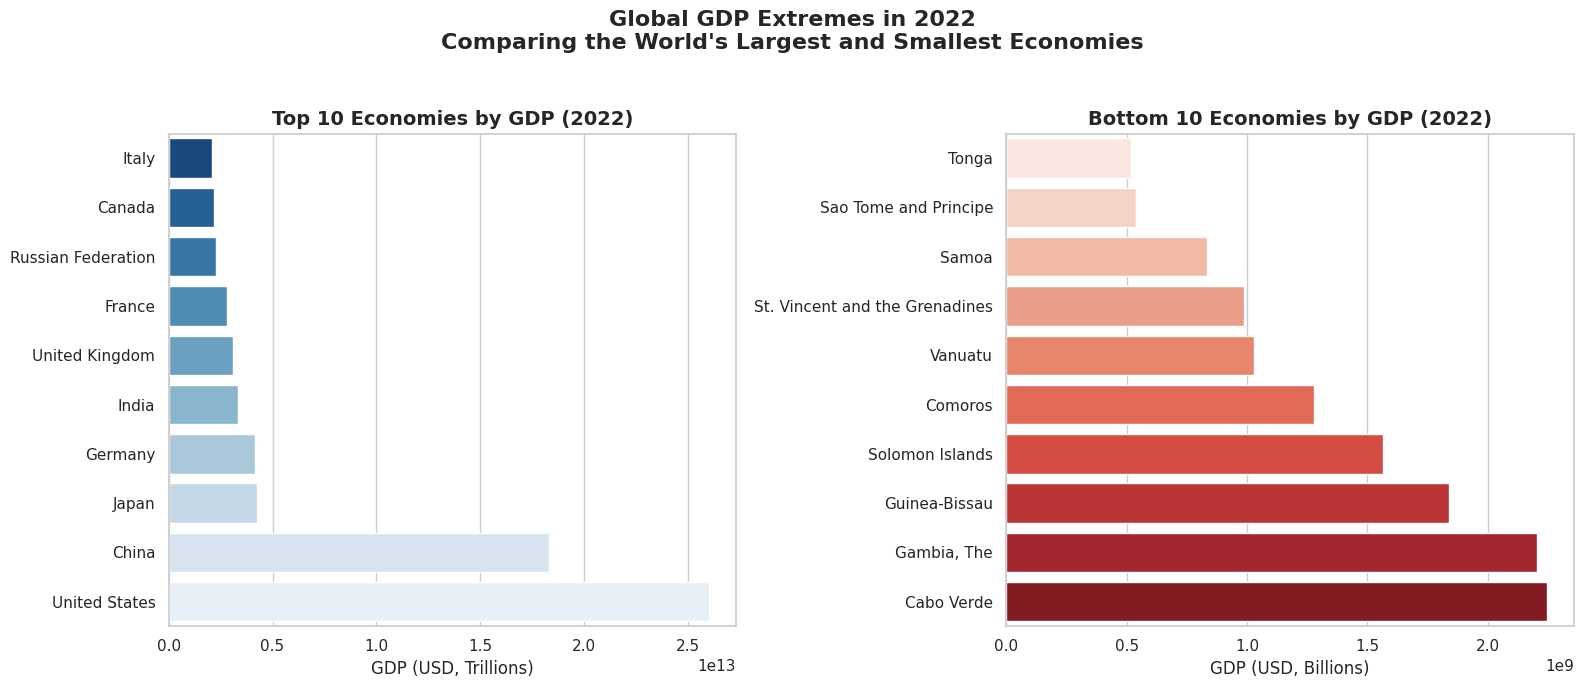

In [44]:

latest_year = df["Year"].max()
df_latest = df[df["Year"] == latest_year]

top_gdp = df_latest.nlargest(10, "GDP (in USD)")
bottom_gdp = df_latest.nsmallest(10, "GDP (in USD)")


sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(16, 7))


sns.barplot(
    data=top_gdp.sort_values("GDP (in USD)", ascending=True),
    x="GDP (in USD)", y="Country Name", palette="Blues_r", ax=ax[0]
)
ax[0].set_title(f"Top 10 Economies by GDP ({latest_year})", fontsize=14, weight="bold")
ax[0].set_xlabel("GDP (USD, Trillions)")
ax[0].set_ylabel("")

sns.barplot(
    data=bottom_gdp.sort_values("GDP (in USD)", ascending=True),
    x="GDP (in USD)", y="Country Name", palette="Reds", ax=ax[1]
)
ax[1].set_title(f"Bottom 10 Economies by GDP ({latest_year})", fontsize=14, weight="bold")
ax[1].set_xlabel("GDP (USD, Billions)")
ax[1].set_ylabel("")

plt.suptitle(f"Global GDP Extremes in {latest_year}\nComparing the World's Largest and Smallest Economies", fontsize=16, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
